In [1]:
# Get the list of variable names to be deleted
variables_to_delete = [
    variable
    for variable in globals().copy()
    if not variable.startswith("__") and variable != "In" and variable != "Out"
]

# Delete the variables
for variable in variables_to_delete:
    del globals()[variable]

In [6]:

# Prompt user for the dataframe name
df_name = input("Enter the dataframe name: ")

# Assuming the dataframe is already assigned to a variable with the name provided by the user
df = globals()[df_name]
df = df.iloc[3: ] # To avoid reading the first row wich contains strings 


# Define the threshold for correlation
threshold = 0.5

# Compute the correlation matrix
corr_matrix = df.corr()

# Prompt the user to enter the column name; Naming should be SGXX
column_name = input("Enter the column name to compare correlations with the rest of the columns: ")

# Check if the entered column name is valid
if column_name not in corr_matrix.columns:
    print("Invalid column name!")
else:
    # Select the specific column for correlation analysis
    correlation_column = corr_matrix[column_name].drop(column_name)

    # Filter correlations above the threshold
    filtered_correlations = correlation_column[correlation_column.abs() > threshold]

    # Sort the correlations from highest to lowest
    sorted_correlations = filtered_correlations.sort_values(ascending=False)

    # Create a new DataFrame to store the results
    result_df = pd.DataFrame({'Column': sorted_correlations.index, 'Correlation': sorted_correlations.values})

    # Print the correlation results

result_df


#correlation with X_RN

,Column,Correlation
0,X_Esq,0.986107
1,X_Dir,0.976833
2,Z_Sup,0.624185
3,X_Sup,0.615856
4,11,0.612879
5,58,0.597347
6,54,0.589612
7,1,0.589514
8,8,0.581478
9,7,0.581365


In [7]:

# Prompt user for the dataframe name
df_name = input("Enter the dataframe name: ")

# Assuming the dataframe is already assigned to a variable with the name provided by the user
df = globals()[df_name]
df = df.iloc[3: ] # To avoid reading the first row wich contains strings 


# Define the threshold for correlation
threshold = 0.5

# Compute the correlation matrix
corr_matrix = df.corr()

# Prompt the user to enter the column name; Naming should be SGXX
column_name = input("Enter the column name to compare correlations with the rest of the columns: ")

# Check if the entered column name is valid
if column_name not in corr_matrix.columns:
    print("Invalid column name!")
else:
    # Select the specific column for correlation analysis
    correlation_column = corr_matrix[column_name].drop(column_name)

    # Filter correlations above the threshold
    filtered_correlations = correlation_column[correlation_column.abs() > threshold]

    # Sort the correlations from highest to lowest
    sorted_correlations = filtered_correlations.sort_values(ascending=False)

    # Create a new DataFrame to store the results
    result_df = pd.DataFrame({'Column': sorted_correlations.index, 'Correlation': sorted_correlations.values})

    # Print the correlation results

result_df


#correlation with Z_RN

,Column,Correlation
0,Z_dir,0.971912
1,Z_Esq,0.959947
2,X_Sup,0.921916
3,Z_Sup,0.918371
4,55,0.696455
5,20,0.683360
6,53,0.666677
7,18,0.662118
8,14,0.660759
9,13,0.655717


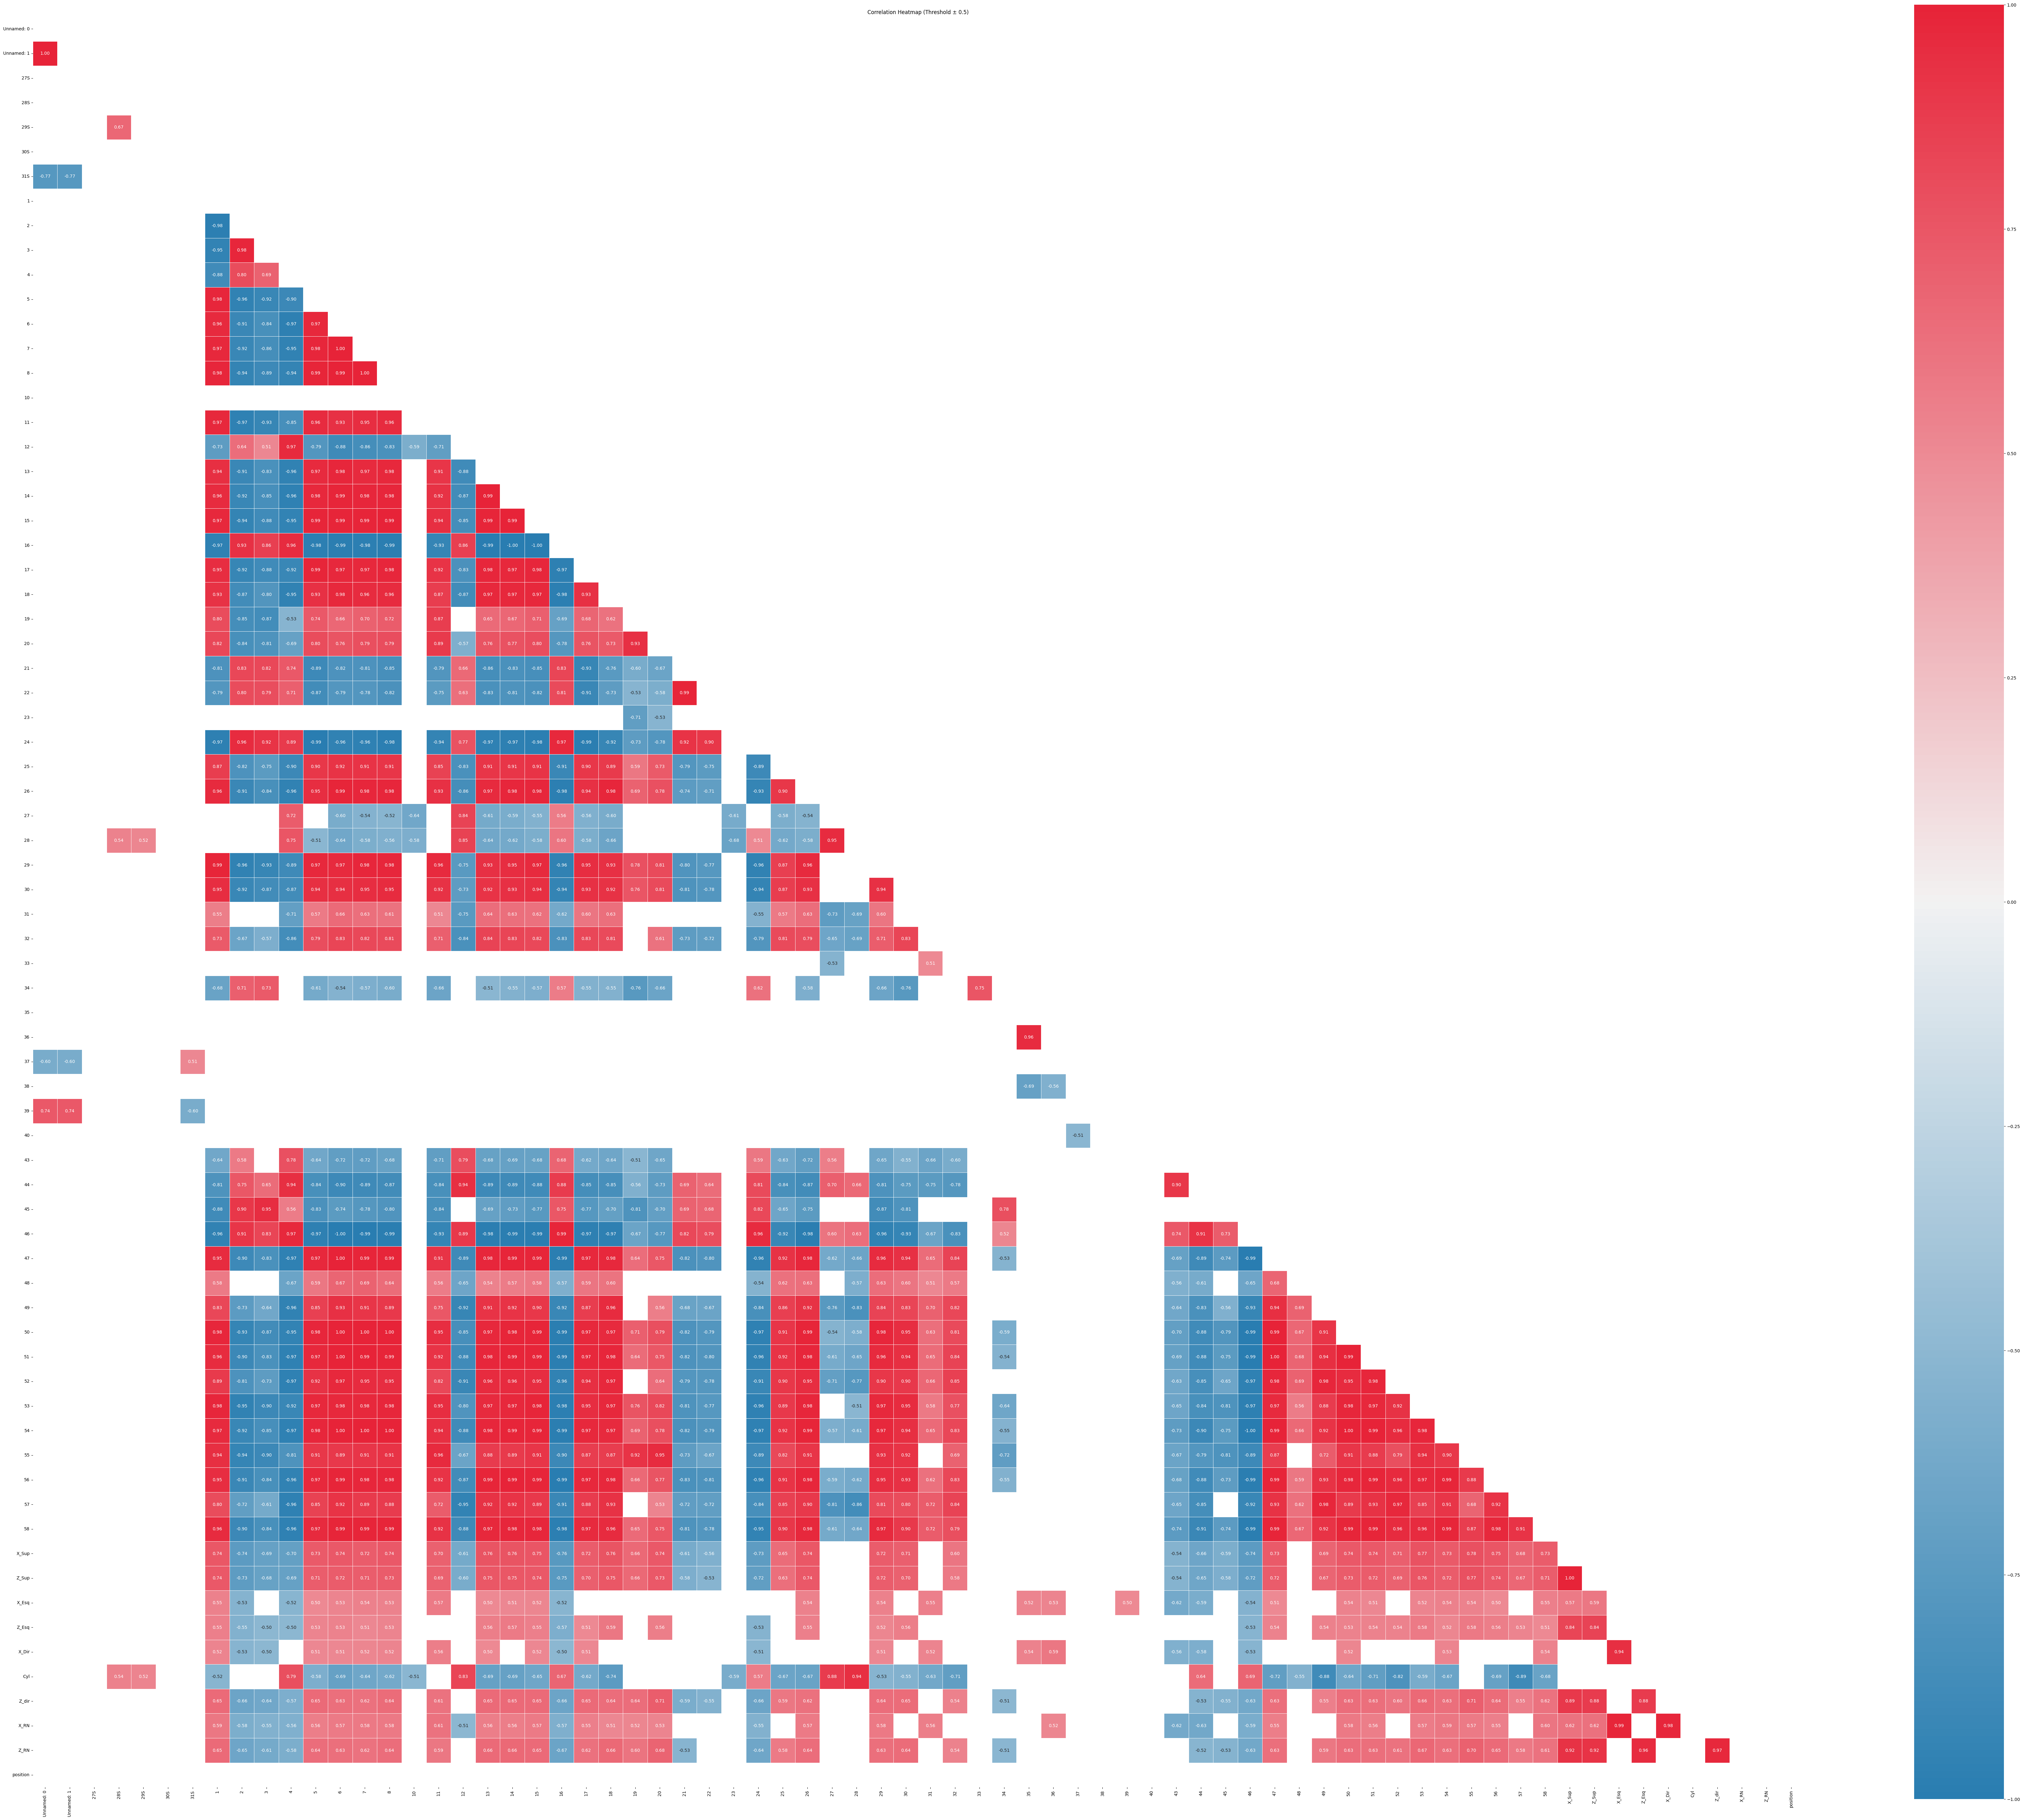

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prompt user for the dataframe name
df_name = input("Enter the dataframe name: ")

# Assuming the dataframe is already assigned to a variable with the name provided by the user
df = globals()[df_name]
df = df.iloc[3:]

# Prompt the user to enter the column names for the correlation heatmap
column_names = input("Enter the column names for the correlation heatmap (comma-separated, or 'ALL' for all columns): ")

# Prompt user for correlation threshold.
threshold = float(input("Enter the desired correlation threshold: "))

if column_names.upper() == "ALL":
    # Select all columns
    df_subset = df
else:
    # Convert input column names to a list
    selected_columns = [col.strip() for col in column_names.split(",")]

    # Select the specified columns by name
    df_subset = df[selected_columns]

# Compute the correlation matrix
corr_matrix = df_subset.corr()

# Create a mask for the upper triangle, for cleanliness purposes.
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure; adaptive size
num_columns = len(df_subset.columns)
fig, ax = plt.subplots(figsize=(num_columns, num_columns))

# Apply the mask to hide the upper triangle
corr_matrix_masked = corr_matrix.mask(mask)

# Create a custom colormap
cmap = sns.diverging_palette(240, 10, s=90, l=50, as_cmap=True)

# Draw the heatmap with the bottom section of the matrix
sns.heatmap(corr_matrix_masked, cmap=cmap, annot=True, fmt=".2f", vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.8},
            mask=(np.abs(corr_matrix_masked) < threshold), ax=ax)

if column_names.upper() == "ALL":
    title = 'Correlation Heatmap (Threshold ± ' + str(threshold) + ')'
else:
    title = f'Correlation Heatmap (Threshold ± ' + str(threshold) + ')'

plt.title(title)
plt.tight_layout()
plt.show()


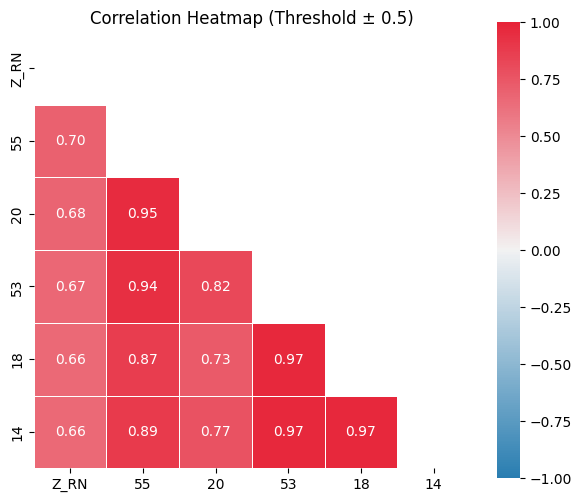

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prompt user for the dataframe name
df_name = input("Enter the dataframe name: ")

# Assuming the dataframe is already assigned to a variable with the name provided by the user
df = globals()[df_name]
df = df.iloc[3:]

# Prompt the user to enter the column names for the correlation heatmap
column_names = input("Enter the column names for the correlation heatmap (comma-separated, or 'ALL' for all columns): ")

# Prompt user for correlation threshold.
threshold = float(input("Enter the desired correlation threshold: "))

if column_names.upper() == "ALL":
    # Select all columns
    df_subset = df
else:
    # Convert input column names to a list
    selected_columns = [col.strip() for col in column_names.split(",")]

    # Select the specified columns by name
    df_subset = df[selected_columns]

# Compute the correlation matrix
corr_matrix = df_subset.corr()

# Create a mask for the upper triangle, for cleanliness purposes.
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure; adaptive size
num_columns = len(df_subset.columns)
fig, ax = plt.subplots(figsize=(num_columns, num_columns))

# Apply the mask to hide the upper triangle
corr_matrix_masked = corr_matrix.mask(mask)

# Create a custom colormap
cmap = sns.diverging_palette(240, 10, s=90, l=50, as_cmap=True)

# Draw the heatmap with the bottom section of the matrix
sns.heatmap(corr_matrix_masked, cmap=cmap, annot=True, fmt=".2f", vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.8},
            mask=(np.abs(corr_matrix_masked) < threshold), ax=ax)

if column_names.upper() == "ALL":
    title = 'Correlation Heatmap (Threshold ± ' + str(threshold) + ')'
else:
    title = f'Correlation Heatmap (Threshold ± ' + str(threshold) + ')'

plt.title(title)
plt.tight_layout()
plt.show()
